# CARGAR LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# DATA SETS

In [40]:
df_train = pd.read_csv('./data/train.csv', index_col='ID')

df_test = pd.read_csv('./data/test.csv', index_col='ID')

df_sample_submission = pd.read_csv('./data/sample_submission.csv', index_col='ID')

In [41]:
df_sample_submission.head(1)

,SeriousDlqin2yrs
ID,
123470,0


In [42]:
df_train.head(1)  # SeriousDlqin2yrs TARGET

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
ID,,,,,,,,,,,
9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0


In [7]:
df_test.head(1)

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
ID,,,,,,,,,,
129460,1.0,21,0,8.0,NaN,0,0,0,0,NaN


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105000 entries, 9580 to 115984
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 1   Age                                   105000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 3   DebtRatio                             105000 non-null  float64
 4   MonthlyIncome                         84164 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 6   NumberOfTimes90DaysLate               105000 non-null  int64  
 7   NumberRealEstateLoansOrLines          105000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 9   NumberOfDependents                    102236 non-null  float64
 10  SeriousDlqin2yrs                      105000 non-null  int64  
dtypes:

In [9]:
df_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [43]:
media_a_rellenar_MonthlyIncome = df_train['MonthlyIncome'].mean()

df_train['MonthlyIncome'].fillna(media_a_rellenar_MonthlyIncome, inplace=True)


media_a_rellenar_NumberOfDependents = df_train['NumberOfDependents'].mean()

df_train['NumberOfDependents'].fillna(media_a_rellenar_NumberOfDependents, inplace=True)

In [11]:
df_train.info()  # limpito

<class 'pandas.core.frame.DataFrame'>
Index: 105000 entries, 9580 to 115984
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 1   Age                                   105000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 3   DebtRatio                             105000 non-null  float64
 4   MonthlyIncome                         105000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 6   NumberOfTimes90DaysLate               105000 non-null  int64  
 7   NumberRealEstateLoansOrLines          105000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 9   NumberOfDependents                    105000 non-null  float64
 10  SeriousDlqin2yrs                      105000 non-null  int64  
dtypes:

<Axes: >

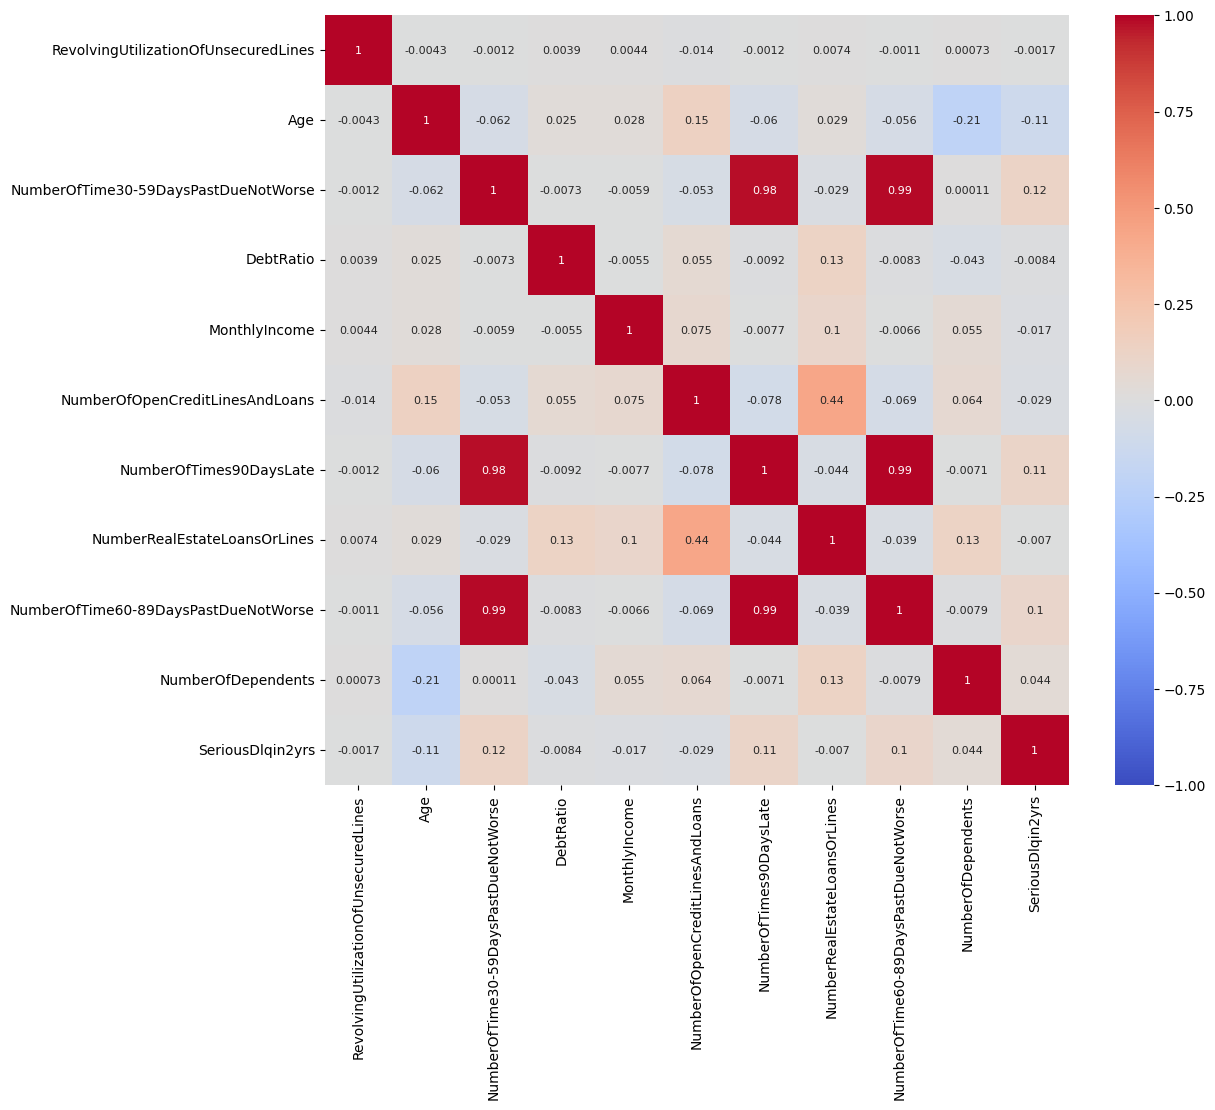

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})

# MODELADO

In [44]:
X = df_train.drop(columns=["SeriousDlqin2yrs"])
y = df_train["SeriousDlqin2yrs"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

este modelo funciona regu


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = DecisionTreeRegressor(random_state=42)


cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')




model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE:", test_mse)

Mean Cross-Validated MSE: 0.10288525132275132
Test MSE: 0.10067421957671957


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


print("MEJORES PARAMETROS SIUU:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validated MSE: 0.05533362500608104


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE:", test_mse)

Test MSE: 0.06127003802731749


___


## PIPELINE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))

In [ ]:
params = {
    'decisiontreeregressor__max_depth': [10, 20, 30],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)  # scoring= "accuracy" sale algo peor el resultado
grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("MSE:", grid_search.best_score_)

Best parameters: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}
Best Cross-Validated MSE: nan


scoring='neg_mean_squared_error' hace que el GridSearchCV maximice el valor negativo del MSE, lo cual es equivalente a minimizar el MSE.
Si omites el parámetro scoring, el GridSearchCV podría no optimizar el MSE, lo que puede afectar la efectividad del ajuste de hiperparámetros para tu problema específico.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE:", test_mse)

Test MSE: 0.04302789243981327


___

ada boost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# ADA BOOST - HADA DE LOS BOSQUES

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,
    learning_rate=0.1,
    random_state=10
)


ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)




print("Accuracy:", accuracy_score(y_test, y_pred))
print("_"*150)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("_"*150)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9386666666666666
______________________________________________________________________________________________________________________________________________________
Confusion Matrix:
 [[19512   156]
 [ 1132   200]]
______________________________________________________________________________________________________________________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19668
           1       0.56      0.15      0.24      1332

    accuracy                           0.94     21000
   macro avg       0.75      0.57      0.60     21000
weighted avg       0.92      0.94      0.92     21000



In [ ]:
# ESCALAR DATOS ___  vamos a hacer un cross validation y un grid search

In [ ]:
df_sample_submission.head(1)

,SeriousDlqin2yrs
ID,
123470,0


In [ ]:
#XG BOOST

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier


gb_model = HistGradientBoostingClassifier(random_state=10)
gb_model.fit(X_train, y_train)


y_pred = gb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9393333333333334
Confusion Matrix:
 [[19492   176]
 [ 1098   234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19668
           1       0.57      0.18      0.27      1332

    accuracy                           0.94     21000
   macro avg       0.76      0.58      0.62     21000
weighted avg       0.92      0.94      0.92     21000



In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# # Crear y aplicar la transformación polinómica
# poly = PolynomialFeatures(degree=2)  # Prueba diferentes grados como 1, 2, y 3
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Escalado de los datos
# scaler = StandardScaler()
# X_train_poly_scaled = scaler.fit_transform(X_train_poly)
# X_test_poly_scaled = scaler.transform(X_test_poly)

# # Búsqueda de hiperparámetros detallada para ElasticNet
# param_grid_elastic = {
#     'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Rango más amplio
#     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
# }

# elastic_net = ElasticNet(random_state=10, max_iter=10000, tol=1e-4)  # Ajuste de max_iter y tol
# grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic, scoring='r2', cv=10)
# grid_search_elastic.fit(X_train_poly_scaled, y_train)

# # Evaluar modelos de regularización adicionales (Ridge y Lasso)
# param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
# ridge = Ridge(random_state=10, max_iter=10000)
# grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='r2', cv=10)
# grid_search_ridge.fit(X_train_poly_scaled, y_train)

# param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
# lasso = Lasso(random_state=10, max_iter=10000)
# grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='r2', cv=10)
# grid_search_lasso.fit(X_train_poly_scaled, y_train)

# # Resultados del mejor modelo ElasticNet
# best_elastic_model = grid_search_elastic.best_estimator_

# # Evaluación usando validación cruzada
# cv_scores = cross_val_score(best_elastic_model, X_train_poly_scaled, y_train, scoring='r2', cv=10)
# print("Promedio de R2 en validación cruzada:", np.mean(cv_scores))

# # Predicciones y evaluación
# print("\nEvaluación en el conjunto de entrenamiento:")
# y_pred_train = best_elastic_model.predict(X_train_poly_scaled)
# print("MAE:", mean_absolute_error(y_train, y_pred_train))
# print("MSE:", mean_squared_error(y_train, y_pred_train))
# print("R2:", r2_score(y_train, y_pred_train))

# print("\nEvaluación en el conjunto de prueba:")
# y_pred_test = best_elastic_model.predict(X_test_poly_scaled)
# print("MAE:", mean_absolute_error(y_test, y_pred_test))
# print("MSE:", mean_squared_error(y_test, y_pred_test))
# print("R2:", r2_score(y_test, y_pred_test))

# # Imprimir los mejores parámetros encontrados
# print("\nMejores parámetros ElasticNet encontrados:")
# print(grid_search_elastic.best_params_)

# # Evaluación de Ridge y Lasso
# print("\nMejores parámetros Ridge encontrados:")
# print(grid_search_ridge.best_params_)

# print("\nMejores parámetros Lasso encontrados:")
# print(grid_search_lasso.best_params_)


# FINAL

In [50]:
media_a_rellenar_MonthlyIncome = df_test['MonthlyIncome'].mean()

df_test['MonthlyIncome'].fillna(media_a_rellenar_MonthlyIncome, inplace=True)


media_a_rellenar_NumberOfDependents = df_test['NumberOfDependents'].mean()

df_test['NumberOfDependents'].fillna(media_a_rellenar_NumberOfDependents, inplace=True)

In [51]:
predicciones_submit = best_model.predict(df_test)

df_test['SeriousDlqin2yrs'] = predicciones_submit

df_entrega = df_test[['SeriousDlqin2yrs']].reset_index()

In [52]:
df_entrega.to_csv('ds_Test_con_predicciones_1.csv', index=False)